In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/feedback-prize-english-language-learning/sample_submission.csv
/kaggle/input/feedback-prize-english-language-learning/train.csv
/kaggle/input/feedback-prize-english-language-learning/test.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
X=pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/train.csv")
test=pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/test.csv")

In [4]:
X.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [5]:
test.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
X1=X["full_text"]
t1=test["full_text"]

In [8]:
X1

0       I think that students would benefit from learn...
1       When a problem is a change you have to let it ...
2       Dear, Principal\n\nIf u change the school poli...
3       The best time in life is when you become yours...
4       Small act of kindness can impact in other peop...
                              ...                        
3906    I believe using cellphones in class for educat...
3907    Working alone, students do not have to argue w...
3908    "A problem is a chance for you to do your best...
3909    Many people disagree with Albert Schweitzer's ...
3910    Do you think that failure is the main thing fo...
Name: full_text, Length: 3911, dtype: object

In [9]:
t1

0    when a person has no experience on a job their...
1    Do you think students would benefit from being...
2    Thomas Jefferson once states that "it is wonde...
Name: full_text, dtype: object

In [10]:
X_new=X1.append(t1,ignore_index=True)

In [11]:
X_new

0       I think that students would benefit from learn...
1       When a problem is a change you have to let it ...
2       Dear, Principal\n\nIf u change the school poli...
3       The best time in life is when you become yours...
4       Small act of kindness can impact in other peop...
                              ...                        
3909    Many people disagree with Albert Schweitzer's ...
3910    Do you think that failure is the main thing fo...
3911    when a person has no experience on a job their...
3912    Do you think students would benefit from being...
3913    Thomas Jefferson once states that "it is wonde...
Name: full_text, Length: 3914, dtype: object

In [12]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(X_new)

In [13]:
tfidf=result.toarray()

In [14]:
tfidf.shape

(3914, 21370)

In [15]:
test=tfidf[len(X1):]
X2=tfidf[:len(X1)]

In [16]:
test.shape

(3, 21370)

In [17]:
X.shape

(3911, 8)

In [18]:
X2.shape

(3911, 21370)

In [19]:
IP=X2.shape[1]

In [20]:
IP

21370

In [21]:
L=int(len(X.index))

In [22]:
X1_train = X.loc[:int(L*0.8)]
y_train = X1_train[['syntax','cohesion','vocabulary','phraseology','grammar','conventions']]
X1_val = X.loc[int(L*0.8)+1:int(L*0.9)]
y_val = X1_val[['syntax','cohesion','vocabulary','phraseology','grammar','conventions']]
X1_test = X.loc[int(L*0.9)+1:]
y_test = X1_test[['syntax','cohesion','vocabulary','phraseology','grammar','conventions']]

In [23]:
tfidf_train=X2[:int(len(X.index)*0.8)+1]
tfidf_val=X2[int(len(X.index)*0.8)+1:int(len(X.index)*0.9)+1]
tfidf_test=X2[int(len(X.index)*0.9)+1:]

In [24]:
y1_train=y_train["syntax"]
y2_train=y_train["cohesion"]
y3_train=y_train["vocabulary"]
y4_train=y_train["phraseology"]
y5_train=y_train["grammar"]
y6_train=y_train["conventions"]

y1_val=y_val["syntax"]
y2_val=y_val["cohesion"]
y3_val=y_val["vocabulary"]
y4_val=y_val["phraseology"]
y5_val=y_val["grammar"]
y6_val=y_val["conventions"]

y1_test=y_test["syntax"]
y2_test=y_test["cohesion"]
y3_test=y_test["vocabulary"]
y4_test=y_test["phraseology"]
y5_test=y_test["grammar"]
y6_test=y_test["conventions"]

In [25]:
print(tfidf_train.shape)
print(y1_train.shape)
print(tfidf_val.shape)
print(y1_val.shape)
print(tfidf_test.shape)
print(y_test.shape)

(3129, 21370)
(3129,)
(391, 21370)
(391,)
(391, 21370)
(391, 6)


In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Lambda, Flatten, Bidirectional
from tensorflow.keras.models import Sequential, load_model, model_from_config
import tensorflow.keras.backend as K 
from sklearn.metrics import mean_squared_error

def get_model_nn():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(input_dim=IP,units=100, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(75, activation='tanh'))
    model.add(Dropout(0.2))
    
    model.add(tf.keras.layers.Dense(10, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(tf.keras.layers.Dense(1, activation='relu'))
    print(model.summary())
    model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])
    return model

In [27]:
embedding_model1 = get_model_nn()
embedding_model2 = get_model_nn()
embedding_model3 = get_model_nn()
embedding_model4= get_model_nn()
embedding_model5 = get_model_nn()
embedding_model6 = get_model_nn()

2022-11-25 09:23:50.077263: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2137100   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 75)                7575      
_________________________________________________________________
dropout_1 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                760       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [28]:
y1_train = np.asarray(y1_train)
y1_val = np.asarray(y1_val)  
y1_test = np.asarray(y1_test)

y2_train = np.asarray(y2_train)
y2_val = np.asarray(y2_val)  
y2_test = np.asarray(y2_test)

y3_train = np.asarray(y3_train)
y3_val = np.asarray(y3_val)
y3_test = np.asarray(y3_test)

y4_train = np.asarray(y4_train)
y4_val = np.asarray(y4_val)  
y4_test = np.asarray(y4_test)  

y5_train = np.asarray(y5_train)
y5_val = np.asarray(y5_val)
y5_test = np.asarray(y5_test)

y6_train = np.asarray(y6_train)
y6_val = np.asarray(y6_val)  
y6_test = np.asarray(y6_test)  

In [29]:

h1=embedding_model1.fit(tfidf_train, y1_train, epochs=100,validation_data=(tfidf_val,y1_val))


2022-11-25 09:23:51.088673: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
98/98 [==============================] - 3s 17ms/step - loss: 0.9121 - accuracy: 0.0026 - val_loss: 0.3506 - val_accuracy: 0.0026
Epoch 2/100
98/98 [==============================] - 1s 15ms/step - loss: 0.5044 - accuracy: 0.0029 - val_loss: 0.3172 - val_accuracy: 0.0026
Epoch 3/100
98/98 [==============================] - 1s 14ms/step - loss: 0.4675 - accuracy: 0.0029 - val_loss: 0.3656 - val_accuracy: 0.0026
Epoch 4/100
98/98 [==============================] - 1s 14ms/step - loss: 0.4323 - accuracy: 0.0029 - val_loss: 0.3348 - val_accuracy: 0.0026
Epoch 5/100
98/98 [==============================] - 1s 15ms/step - loss: 0.4062 - accuracy: 0.0029 - val_loss: 0.3893 - val_accuracy: 0.0026
Epoch 6/100
98/98 [==============================] - 1s 15ms/step - loss: 0.3683 - accuracy: 0.0029 - val_loss: 0.3539 - val_accuracy: 0.0026
Epoch 7/100
98/98 [==============================] - 1s 14ms/step - loss: 0.3543 - accuracy: 0.0026 - val_loss: 0.3830 - val_accuracy: 0.0026
Epoch 

In [30]:
h2=embedding_model2.fit(tfidf_train, y2_train, epochs=100,validation_data=(tfidf_val,y2_val))
h3=embedding_model3.fit(tfidf_train, y3_train, epochs=100,validation_data=(tfidf_val,y3_val))
h4=embedding_model4.fit(tfidf_train, y4_train, epochs=100,validation_data=(tfidf_val,y4_val))
h5=embedding_model5.fit(tfidf_train, y5_train, epochs=100,validation_data=(tfidf_val,y5_val))
h6=embedding_model6.fit(tfidf_train, y6_train, epochs=100,validation_data=(tfidf_val,y6_val))

Epoch 1/100
98/98 [==============================] - 3s 24ms/step - loss: 0.9468 - accuracy: 0.0022 - val_loss: 0.3293 - val_accuracy: 0.0026
Epoch 2/100
98/98 [==============================] - 1s 14ms/step - loss: 0.5974 - accuracy: 0.0022 - val_loss: 0.3294 - val_accuracy: 0.0026
Epoch 3/100
98/98 [==============================] - 1s 15ms/step - loss: 0.5193 - accuracy: 0.0022 - val_loss: 0.3608 - val_accuracy: 0.0026
Epoch 4/100
98/98 [==============================] - 1s 15ms/step - loss: 0.4808 - accuracy: 0.0019 - val_loss: 0.3456 - val_accuracy: 0.0026
Epoch 5/100
98/98 [==============================] - 1s 15ms/step - loss: 0.4269 - accuracy: 0.0019 - val_loss: 0.3389 - val_accuracy: 0.0026
Epoch 6/100
98/98 [==============================] - 1s 15ms/step - loss: 0.3947 - accuracy: 0.0016 - val_loss: 0.3432 - val_accuracy: 0.0026
Epoch 7/100
98/98 [==============================] - 1s 15ms/step - loss: 0.3906 - accuracy: 0.0022 - val_loss: 0.3641 - val_accuracy: 0.0026
Epoch 

In [31]:
results1 = embedding_model1.predict(tfidf_test).flatten()
results1= [round(r,1) for r in results1]  

results2 = embedding_model2.predict(tfidf_test).flatten()
results2 = [round(r,1) for r in results2]  

results3 = embedding_model3.predict(tfidf_test).flatten()
results3 = [round(r,1) for r in results3]  

results4 = embedding_model4.predict(tfidf_test).flatten()
results4 = [round(r,1) for r in results4]  

results5 = embedding_model5.predict(tfidf_test).flatten()
results5 = [round(r,1) for r in results5]  

results6 = embedding_model6.predict(tfidf_test).flatten()
results6 = [round(r,1) for r in results6] 

In [32]:
y1_test= list(y1_test)
y2_test= list(y2_test)
y3_test= list(y3_test)
y4_test= list(y4_test)
y5_test= list(y5_test)
y6_test= list(y6_test)


In [33]:
from sklearn.metrics import mean_squared_error
values1 = mean_squared_error(results1,y1_test)
values2 = mean_squared_error(results2,y2_test)
values3 = mean_squared_error(results3,y3_test)
values4 = mean_squared_error(results4,y4_test)
values5 = mean_squared_error(results5,y5_test)
values6 = mean_squared_error(results6,y6_test)

In [34]:
test_error=values1+values2+values3+values4+values5+values6
test_mcrmse= test_error/6
test_mcrmse

0.4513981209772883

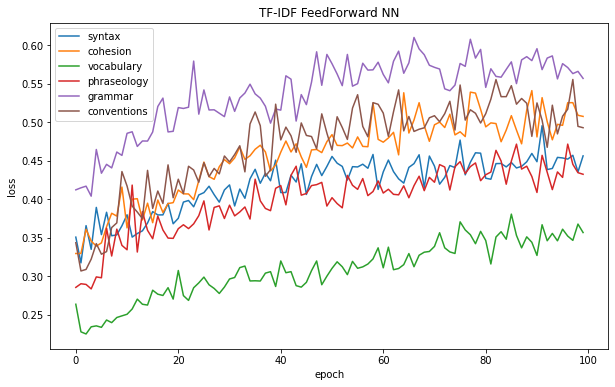

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_orig()

fig = plt.figure(figsize=(10, 6))

plt.plot(h1.history['val_loss'])
plt.plot(h2.history['val_loss'])
plt.plot(h3.history['val_loss'])
plt.plot(h4.history['val_loss'])
plt.plot(h5.history['val_loss'])
plt.plot(h6.history['val_loss'])

plt.title('TF-IDF FeedForward NN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['syntax','cohesion','vocabulary','phraseology','grammar','conventions'], loc='upper left')

# Final Prediction for submission

In [36]:
test.shape

(3, 21370)

In [37]:
test1 = embedding_model1.predict(test).flatten()
test1= [round(r,1) for r in test1]  

test2 = embedding_model2.predict(test).flatten()
test2= [round(r,1) for r in test2]
test3 = embedding_model3.predict(test).flatten()
test3= [round(r,1) for r in test3]

test4 = embedding_model4.predict(test).flatten()
test4= [round(r,1) for r in test4]

test5 = embedding_model5.predict(test).flatten()
test5= [round(r,1) for r in test5]

test6 = embedding_model6.predict(test).flatten()
test6= [round(r,1) for r in test6]


In [38]:
t1=pd.read_csv("/kaggle/input/feedback-prize-english-language-learning/test.csv")

In [39]:
final=pd.DataFrame()

final['text_id']=t1["text_id"]
final['syntax']=test1
final['cohesion']=test2
final['vocabulary']=test3
final['phraseology']=test4
final['grammar']=test5
final['conventions']=test6

In [40]:
final

,text_id,syntax,cohesion,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,2.7,2.5,2.7,2.6,2.6,3.0
1,000BAD50D026,2.8,2.4,2.5,2.6,2.4,3.3
2,00367BB2546B,2.5,3.0,3.6,2.7,3.1,2.8


In [41]:
final.to_csv('submission.csv', index=False)

In [42]:
final

,text_id,syntax,cohesion,vocabulary,phraseology,grammar,conventions
0,0000C359D63E,2.7,2.5,2.7,2.6,2.6,3.0
1,000BAD50D026,2.8,2.4,2.5,2.6,2.4,3.3
2,00367BB2546B,2.5,3.0,3.6,2.7,3.1,2.8
